In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt

In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/Dataset/IRIS.csv')
train_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<ipython-input-20-1b9b02dec490>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_data, x='sepal_length', y='species', inner='stick', palette='Dark2')


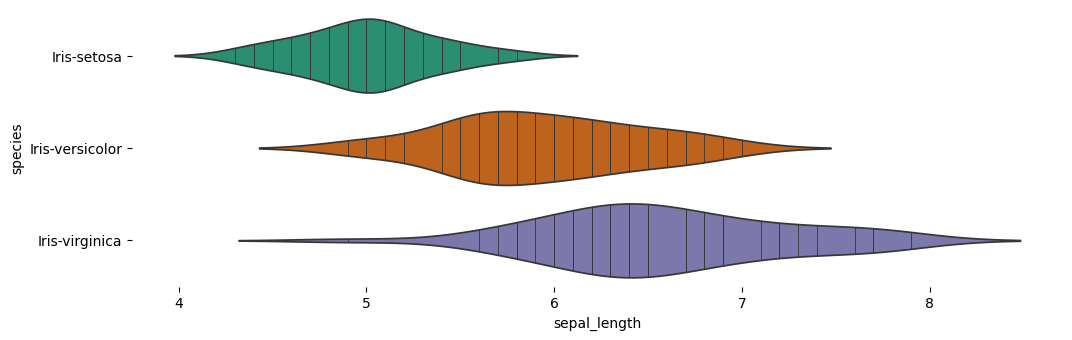

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

figsize = (12, 1.2 * len(train_data['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_data, x='sepal_length', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-19-f0bc533cd783>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_data, x='sepal_width', y='species', inner='stick', palette='Dark2')


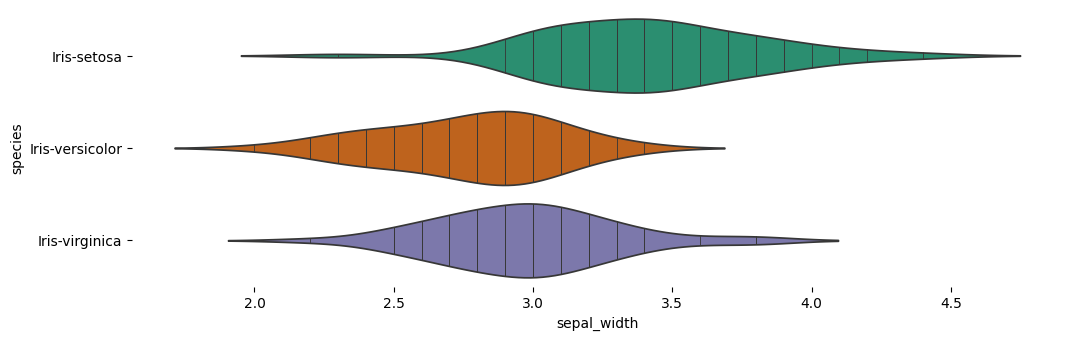

In [ ]:
figsize = (12, 1.2 * len(train_data['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_data, x='sepal_width', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-18-57de1870d781>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_data, x='petal_length', y='species', inner='stick', palette='Dark2')


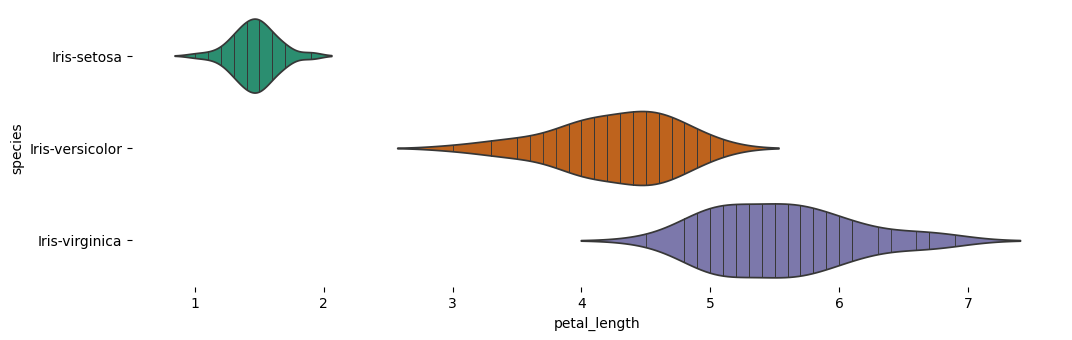

In [ ]:
figsize = (12, 1.2 * len(train_data['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_data, x='petal_length', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-17-7a8817382ef6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_data, x='petal_width', y='species', inner='stick', palette='Dark2')


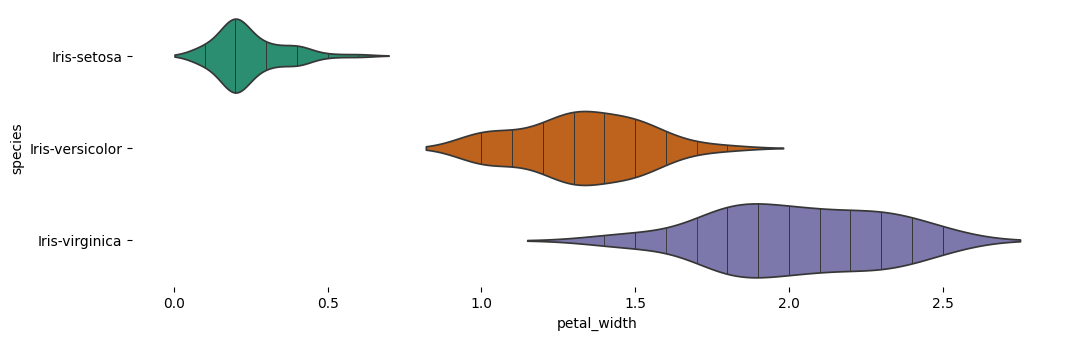

In [ ]:
figsize = (12, 1.2 * len(train_data['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_data, x='petal_width', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
train_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
train_data['species'] = train_data['species'].map( {'Iris-virginica': 2,'Iris-setosa': 0,'Iris-versicolor':1}).astype(nm.float64)

In [ ]:
train_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump, load

X = train_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = train_data['species']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)


Random Forest accuracy: 93.33%


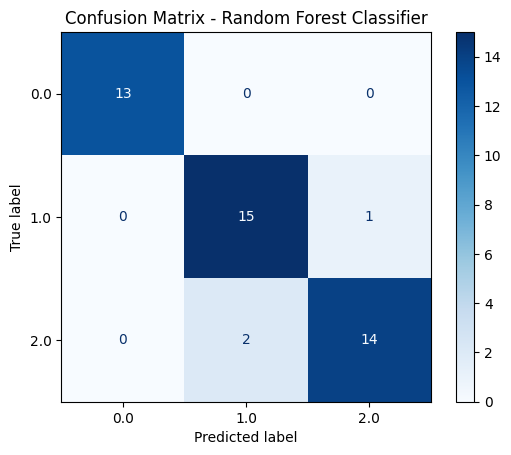

In [40]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(x_train, y_train)
y_pred_rf = RF.predict(x_test)

#Accuracy Cal
RFAcc = accuracy_score(y_test, y_pred_rf)
print('Random Forest accuracy: {:.2f}%'.format(RFAcc * 100))

dump(RF, 'random_forest_model.joblib')

#Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=RF.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


K-Nearest Neighbors accuracy: 95.56%


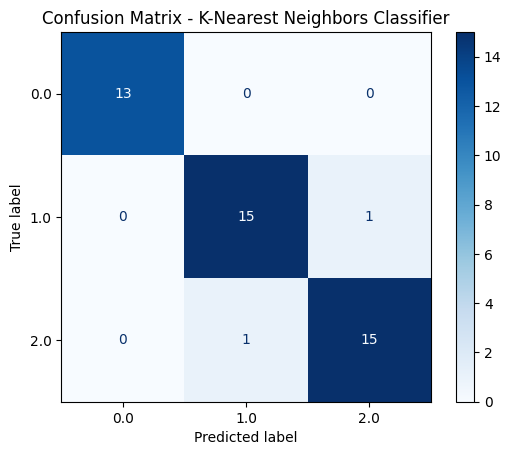

In [39]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)

y_pred_knn = KNN.predict(x_test)

KNNAcc = accuracy_score(y_test, y_pred_knn)
print('K-Nearest Neighbors accuracy: {:.2f}%'.format(KNNAcc * 100))

dump(KNN, 'knn_model.joblib')

# Display confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=KNN.classes_)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - K-Nearest Neighbors Classifier')
plt.show()

In [38]:
from tabulate import tabulate

table = [
    ['Random Forest', '{:.3f}%'.format(RFAcc* 100)],
    ['K-Nearest Neighbor', '{:.3f}%'.format(KNNAcc * 100)]
]

headers = ['Model', 'Accuracy']
print(tabulate(table, headers=headers, tablefmt='grid'))

+--------------------+------------+
| Model              | Accuracy   |
+====================+============+
| Random Forest      | 93.333%    |
+--------------------+------------+
| K-Nearest Neighbor | 95.556%    |
+--------------------+------------+
